In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [2]:
train_set = pd.read_csv('..\\..\\data\\03_Processed\\preprocessed_train_set.csv')
X_train = train_set.drop('math score', axis=1)
y_train = train_set['math score']
test_set = pd.read_csv('..\\..\\data\\03_Processed\\preprocessed_test_set.csv')
X_test = test_set.drop('math score', axis=1)
y_test = test_set['math score']

In [43]:
train_set

,standard scaler__reading score,standard scaler__writing score,one hot encoder__gender_male,one hot encoder__race/ethnicity_group A,one hot encoder__race/ethnicity_group B,one hot encoder__race/ethnicity_group C,one hot encoder__race/ethnicity_group D,one hot encoder__race/ethnicity_group E,one hot encoder__parental level of education_associate's degree,one hot encoder__parental level of education_bachelor's degree,one hot encoder__parental level of education_high school,one hot encoder__parental level of education_master's degree,one hot encoder__parental level of education_some college,one hot encoder__parental level of education_some high school,one hot encoder__lunch_standard,one hot encoder__test preparation course_none,math score
0,0.030791,0.434053,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,62
1,0.930290,0.964701,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66
2,1.345443,1.163694,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,79
3,-0.176786,-0.162925,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,61
4,-0.384363,-0.759904,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,2.106557,2.092328,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,87
796,-0.453555,-0.494580,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,69
797,-0.522747,-1.025228,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,53
798,-1.491438,-1.025228,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50


In [3]:
X_train

,standard scaler__reading score,standard scaler__writing score,one hot encoder__gender_male,one hot encoder__race/ethnicity_group A,one hot encoder__race/ethnicity_group B,one hot encoder__race/ethnicity_group C,one hot encoder__race/ethnicity_group D,one hot encoder__race/ethnicity_group E,one hot encoder__parental level of education_associate's degree,one hot encoder__parental level of education_bachelor's degree,one hot encoder__parental level of education_high school,one hot encoder__parental level of education_master's degree,one hot encoder__parental level of education_some college,one hot encoder__parental level of education_some high school,one hot encoder__lunch_standard,one hot encoder__test preparation course_none
0,0.030791,0.434053,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,0.930290,0.964701,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.345443,1.163694,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.176786,-0.162925,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-0.384363,-0.759904,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,2.106557,2.092328,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
796,-0.453555,-0.494580,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
797,-0.522747,-1.025228,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
798,-1.491438,-1.025228,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [4]:
y_train

0      62
1      66
2      79
3      61
4      73
       ..
795    87
796    69
797    53
798    50
799    85
Name: math score, Length: 800, dtype: int64

In [5]:
X_test

,standard scaler__reading score,standard scaler__writing score,one hot encoder__gender_male,one hot encoder__race/ethnicity_group A,one hot encoder__race/ethnicity_group B,one hot encoder__race/ethnicity_group C,one hot encoder__race/ethnicity_group D,one hot encoder__race/ethnicity_group E,one hot encoder__parental level of education_associate's degree,one hot encoder__parental level of education_bachelor's degree,one hot encoder__parental level of education_high school,one hot encoder__parental level of education_master's degree,one hot encoder__parental level of education_some college,one hot encoder__parental level of education_some high school,one hot encoder__lunch_standard,one hot encoder__test preparation course_none
0,1.137866,1.031032,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,-0.245978,0.301391,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.238367,0.235060,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.515136,0.301391,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.930290,0.633046,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.868708,-0.826235,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
196,-0.937901,-1.025228,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
197,0.791905,0.500384,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
198,0.515136,0.367722,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [6]:
y_test

0      91
1      53
2      80
3      74
4      84
       ..
195    52
196    62
197    74
198    65
199    61
Name: math score, Length: 200, dtype: int64

In [7]:
models = {
    "Linear Regressor": LinearRegression(),
    "Ridge Regressor": Ridge(),
    "Lasso Regressor": Lasso(),
    "ElasticNet Regressor": ElasticNet(),
    "KNN Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boost Regressor": GradientBoostingRegressor(),
    "Ada Boost Regressor": AdaBoostRegressor(),
    "Cat Boost Regressor": CatBoostRegressor(),
    "XGBoost Regressor": XGBRegressor()
}

In [8]:
r2_scores = {}
for model_name in models.keys():
    print(f'start to fit {model_name}:')
    models[model_name].fit(X_train, y_train)
    r2_scores[model_name] = r2_score(y_test, models[model_name].predict(X_test))

start to fit Linear Regressor:
start to fit Ridge Regressor:
start to fit Lasso Regressor:
start to fit ElasticNet Regressor:
start to fit KNN Regressor:
start to fit Decision Tree Regressor:
start to fit Random Forest Regressor:
start to fit Gradient Boost Regressor:
start to fit Ada Boost Regressor:
start to fit Cat Boost Regressor:
Learning rate set to 0.039525
0:	learn: 14.6184027	total: 95.4ms	remaining: 1m 35s
1:	learn: 14.2492331	total: 96.1ms	remaining: 48s
2:	learn: 13.9018209	total: 96.9ms	remaining: 32.2s
3:	learn: 13.5696575	total: 98.2ms	remaining: 24.4s
4:	learn: 13.2181332	total: 99.2ms	remaining: 19.7s
5:	learn: 12.8776692	total: 100ms	remaining: 16.6s
6:	learn: 12.6009457	total: 101ms	remaining: 14.3s
7:	learn: 12.3099015	total: 102ms	remaining: 12.6s
8:	learn: 12.0225549	total: 103ms	remaining: 11.3s
9:	learn: 11.7488577	total: 104ms	remaining: 10.3s
10:	learn: 11.5045269	total: 105ms	remaining: 9.42s
11:	learn: 11.2804139	total: 106ms	remaining: 8.71s
12:	learn: 11.0

In [9]:
for model in r2_scores.keys():
    print(f"score of {model} is {r2_scores[model]}")

score of Linear Regressor is 0.8804332983749565
score of Ridge Regressor is 0.880532604834077
score of Lasso Regressor is 0.8254465092551198
score of ElasticNet Regressor is 0.7107869191368297
score of KNN Regressor is 0.7559513829301088
score of Decision Tree Regressor is 0.7189716049748005
score of Random Forest Regressor is 0.849231343045437
score of Gradient Boost Regressor is 0.8727357946295351
score of Ada Boost Regressor is 0.8451118768070828
score of Cat Boost Regressor is 0.8504259342173254
score of XGBoost Regressor is 0.8212205171585083


In [10]:
max(r2_scores.keys(), key=r2_scores.get)

'Ridge Regressor'

In [102]:
from sklearn.model_selection import GridSearchCV

param = {
    'alpha': [0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

grid_search = GridSearchCV(
    estimator=Ridge(),
    param_grid=param,
    n_jobs=-1,
    cv=5,
    scoring='r2'
)

# 3. Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# After fitting, you can get the best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best R2 Score: {grid_search.best_score_}")

Best Parameters: {'alpha': 1, 'solver': 'sparse_cg'}
Best R2 Score: 0.8686052316053777


In [6]:
regressor = Ridge(alpha=1, solver='sag')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print(r2_score(y_test,y_pred))

0.8805342771290932


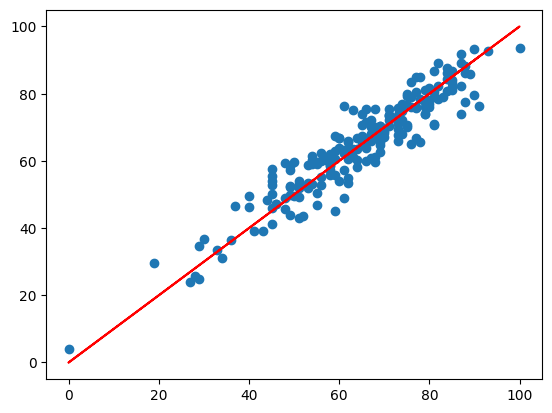

In [8]:
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.show()

In [20]:
pd.concat((y_test, pd.DataFrame(y_pred, columns=['prediction'])), axis=1)

,math score,prediction
0,91,76.402743
1,53,58.861907
2,80,76.969166
3,74,76.781817
4,84,87.604326
...,...,...
195,52,43.533168
196,62,62.169287
197,74,67.923609
198,65,67.071307


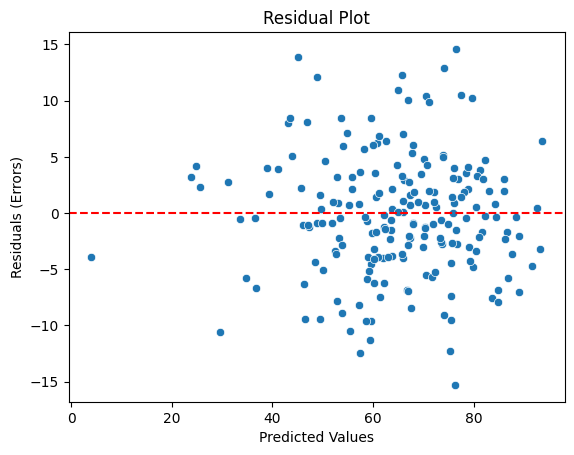

In [22]:
# Calculate residuals
residuals = y_test - y_pred

sns.scatterplot(x=y_pred, y=residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Errors)")
plt.title("Residual Plot")

# Add a horizontal line at y=0
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

In [42]:
X_test

,standard scaler__reading score,standard scaler__writing score,one hot encoder__gender_male,one hot encoder__race/ethnicity_group A,one hot encoder__race/ethnicity_group B,one hot encoder__race/ethnicity_group C,one hot encoder__race/ethnicity_group D,one hot encoder__race/ethnicity_group E,one hot encoder__parental level of education_associate's degree,one hot encoder__parental level of education_bachelor's degree,one hot encoder__parental level of education_high school,one hot encoder__parental level of education_master's degree,one hot encoder__parental level of education_some college,one hot encoder__parental level of education_some high school,one hot encoder__lunch_standard,one hot encoder__test preparation course_none
0,1.137866,1.031032,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,-0.245978,0.301391,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.238367,0.235060,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.515136,0.301391,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.930290,0.633046,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.868708,-0.826235,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
196,-0.937901,-1.025228,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
197,0.791905,0.500384,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
198,0.515136,0.367722,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [40]:
pd.concat((X_test, residuals), axis=1).columns

Index(['standard scaler__reading score', 'standard scaler__writing score',
       'one hot encoder__gender_male',
       'one hot encoder__race/ethnicity_group A',
       'one hot encoder__race/ethnicity_group B',
       'one hot encoder__race/ethnicity_group C',
       'one hot encoder__race/ethnicity_group D',
       'one hot encoder__race/ethnicity_group E',
       'one hot encoder__parental level of education_associate's degree',
       'one hot encoder__parental level of education_bachelor's degree',
       'one hot encoder__parental level of education_high school',
       'one hot encoder__parental level of education_master's degree',
       'one hot encoder__parental level of education_some college',
       'one hot encoder__parental level of education_some high school',
       'one hot encoder__lunch_standard',
       'one hot encoder__test preparation course_none', 'math score'],
      dtype='object')

<Axes: xlabel='math score', ylabel='Count'>

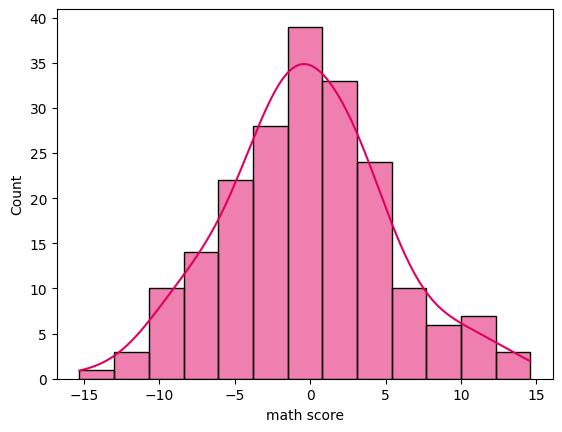

In [101]:
sns.histplot(residuals, kde=True, color="#e00061")

In [24]:
min(residuals), max(residuals)

(-15.293406449209442, 14.597257436497188)